# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

We seek to understand the reasons behind the variations in participation rates for the SATs and ACT across tests and look at what steps we can take to most effectively increase SAT participation rates.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/sat_2017.csv')
act_2017 = pd.read_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Dsiplaying first 10 rows for sat 2017
sat_2017.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# showing first 10 rows for act 2017
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The first step is to understand the difference between the SAT and ACT. The SAT contains 2 section scored between 200 and 800 - making the total scoring range 400 - 1600. On the other hand, the ACT has 4 sections scored 1 - 36 and the composite is the average of these sections.

The datasets are fairly similar. The columns include state, participation followed by the average scores of each state (the total/ composite on the last column). The rows represent the various US states (50 in total) but the ACT dataset has an additional row for the national level data.

#### 4a. Does the data look complete? 

Answer: Yes, for both datasets, there are no blank/ empty values.

In [5]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [6]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: For the SAT: the minimum for each one of the 2 subjects is 200, the maximum is 800. The total score is the sum of these 2 tests, making the range 400 - 1600.
For the ACT: THere are 4 tests each with a score range of 1 - 36 and the composite score will be the average of all these tests.There are the following errors in the data:

1. Maryland's math score should be 524 and not 52.

2. Maryland's ACT science score should be 23.2.

3. Wyoming's composite ACT score should be 20.2.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# Error was found later on when plotting scatter. Seems that one of the SAT 2017 Math scores was entered erronously
# Wyoming's error will be corrected below when we correct the datatype for the composite column.
sat_2017.loc[20,'Math'] = 524
act_2017.loc[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The obvious anomaly would be the composite scores for ACT are not in float form. We can also convert the participation rate into a float value for further calculations down the road.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
def string_to_float(dframe, column):
    dframe[column] = dframe[column].apply( lambda x: float(x.replace("%",""))) # <--here we remove the % from the string
    dframe[column] = dframe[column] / 100                               # <-- we then scale (i.e. 100% = 1.00) 
    print(dframe[column].dtypes)                                        # <-- we then print the dtype of that column as a check
    return dframe.head(5)                                               # <-- we return the first 5 rows to check

In [11]:
string_to_float(act_2017, 'Participation')

float64


,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [12]:
sat_2017_2 = sat_2017
string_to_float(sat_2017_2, 'Participation')

float64


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
# we also have to convert the composite for ACT to a float as well
# we modify our function slightly as now we do not have to remvoe the % and do not have to scale

def string_to_float_simple(dframe, column):
    dframe[column] = dframe[column].str.slice(stop=4)
    dframe[column] = dframe[column].apply( lambda x: float(x))  # <-- then we change the datatype to float
    print(dframe[column].dtypes)                                        # <-- we then print the dtype of that column as a check
    return dframe.head(5)                                               # <-- we return the first 5 rows to check

In [14]:
# we run this code directly on the act_2017_2 dataframe
string_to_float_simple(act_2017, 'Composite') 

float64


,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [15]:
#Code
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [16]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
#code, dictionary method FOR ACT 2017
new_columns_dict_act2017 = {
    'State': 'state',
    'Participation': 'part_act2017',
    'English': 'english_act2017',
    'Math': 'math_act2017',
    'Reading':'reading_act2017',
    'Science': 'science_act2017',
    'Composite': 'composite_act2017',
}
act_2017.rename(columns = new_columns_dict_act2017, inplace = True)

In [18]:
#code, dictionary method FOR SAT 2017
new_columns_dict_sat2017 = {
    'State': 'state',
    'Participation': 'part_sat2017',
    'Evidence-Based Reading and Writing': 'read_n_write_sat2017',
    'Math': 'math_sat2017',
    'Total': 'total_sat2017',
}
sat_2017.rename(columns = new_columns_dict_sat2017, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|ACT 2017|*State*|
|**part_act2017**|float|ACT 2017|*Participation for the state for 2017 ACT (scaled from 0 - 1*|
|**english_act2017**|float|ACT 2017|*Average score for state for English component for 2017 ACT*|
|**math_act2017**|float|ACT 2017|*Average score for state for Math component for 2017 ACT*|
|**reading_act2017**|float|ACT 2017|*Average score for state for Reading component for 2017 ACT*|
|**science_act2017**|float|ACT 2017|*Average score for state for Science component for 2017 ACT*|
|**composite_act2017**|float|ACT 2017|*Average composite score for state for 2017 ACT*|
|**state**|object|SAT 2017|*State*|
|**part_sat2017**|float|SAT 2017|*Participation for the state for 2017 SAT (scaled from 0 - 1*|
|**read_n_write_sat2017**|int|SAT 2017|*Average Evidence-based Reading and Writing score for state for 2017 SAT*|
|**math_sat2017**|int|SAT 2017|*Average Math score for state for 2017 SAT*|
|**total_sat2017**|int|SAT 2017|*Average Total score for state for 2017 SAT*|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [19]:
#code
act_2017 = act_2017.drop(act_2017.index[0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [20]:
combined_2017 = act_2017.join(sat_2017.set_index('state'), on='state')

In [21]:
combined_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
#code
combined_2017.to_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
# Read in the 2 2018 files and assign them to variables
sat_2018 = pd.read_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/sat_2018.csv')
act_2018 = pd.read_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/act_2018_updated.csv')

In [24]:
# Check null values ACT
act_2018.isnull().sum()
# Data ok

State                            0
Percentage of Students Tested    0
Average Composite Score          0
Average English Score            0
Average Math Score               0
Average Reading Score            0
Average Science Score            0
dtype: int64

In [25]:
# Check null values SAT
sat_2018.isnull().sum()
# Data ok

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [26]:
# Check data types ACT
act_2018.dtypes

# Next Steps: convert percentage of students tested to float
# Mental note: will have to rearrange and rename columns later on

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [27]:
# Check data types SAT
sat_2018.dtypes
# Next steps: convert participation of students to float,this data is similar to 2017 one, we can reuse the function
# Mental note: Rename columns

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [28]:
# We define a new function for ACT 2018 participation
def string_to_float_2(dframe, column):
    dframe[column] = dframe[column].apply( lambda x: float(x)) # <--here we remove the % from the string
    dframe[column] = dframe[column] / 100                               # <-- we then scale (i.e. 100% = 1.00) 
    print(dframe[column].dtypes)                                        # <-- we then print the dtype of that column as a check
    return dframe.head(5)                                               # <-- we return the first 5 rows to check

In [29]:
string_to_float_2(act_2018, 'Percentage of Students Tested')

float64


,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [30]:
string_to_float(sat_2018, 'Participation')

float64


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [31]:
# Next, we rename columns for ACT 2018
new_columns_dict_act2018 = {
    'State': 'state',
    'Percentage of Students Tested': 'part_act2018',
    'Average English Score': 'english_act2018',
    'Average Math Score': 'math_act2018',
    'Average Reading Score': 'reading_act2018',
    'Average Science Score': 'science_act2018',
    'Average Composite Score': 'composite_act2018',
}
act_2018.rename(columns = new_columns_dict_act2018, inplace = True)

In [32]:
# Next we reorder the columns to follow the 2017 ACT data
desired_columns_act2018 = ['state', 'part_act2018', 'english_act2018', 'math_act2018', 'reading_act2018', 'science_act2018', 'composite_act2018']
act_2018 = act_2018[desired_columns_act2018]

In [33]:
# Next we rename columns for SAT 2018
new_columns_dict_sat2018 = {
    'State': 'state',
    'Participation': 'part_sat2018',
    'Evidence-Based Reading and Writing': 'read_n_write_sat2018',
    'Math': 'math_sat2018',
    'Total': 'total_sat2018',
}
sat_2018.rename(columns = new_columns_dict_sat2018, inplace = True)

In [34]:
# We run a quick check on the shape and dtypes before combining the 2 files into a consolidated 2018 one
print(act_2018.shape)
print(sat_2018.shape)
print(act_2018.dtypes)
print(sat_2018.dtypes)

(51, 7)
(51, 5)
state                 object
part_act2018         float64
english_act2018      float64
math_act2018         float64
reading_act2018      float64
science_act2018      float64
composite_act2018    float64
dtype: object
state                    object
part_sat2018            float64
read_n_write_sat2018      int64
math_sat2018              int64
total_sat2018             int64
dtype: object


In [35]:
# We can now combine both 2018 files
combined_2018 = act_2018.join(sat_2018.set_index('state'), on='state')

In [36]:
combined_2018.head(5)

,state,part_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [37]:
# We now export the combined file
combined_2018.to_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [38]:
final = combined_2017.join(combined_2018.set_index('state'), on='state')

In [39]:
final.head(5)

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,part_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
5,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [40]:
# export final data out
final.to_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
part_act2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
composite_act2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
part_sat2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
read_n_write_sat2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
def stdev(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x-mean) ** 2 for x in data) / n
    standard_dev = math.sqrt(variance)
    return standard_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
#Code:
sd = {x: stdev(final[x]) for x in final.columns if final[x].dtypes != object}
sd

{'part_act2017': 0.3182417575123181,
 'english_act2017': 2.3304876369363363,
 'math_act2017': 1.9624620273436781,
 'reading_act2017': 2.0469029314842646,
 'science_act2017': 1.7222161451443676,
 'composite_act2017': 2.000786081581989,
 'part_sat2017': 0.3492907076664507,
 'read_n_write_sat2017': 45.21697020437866,
 'math_sat2017': 46.65713364485503,
 'total_sat2017': 91.58351056778743,
 'part_act2018': 0.33745194881997503,
 'english_act2018': 2.4222536143202795,
 'math_act2018': 2.015707255555717,
 'reading_act2018': 2.145891884510421,
 'science_act2018': 1.8516885484833543,
 'composite_act2018': 2.0855261815801147,
 'part_sat2018': 0.3694661922353942,
 'read_n_write_sat2018': 47.03460978357609,
 'math_sat2018': 47.30194550378352,
 'total_sat2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Yes. There is a need to include the degrees of freedom to adjust the equatoin from taking the population standard deviation to the sample standard deviation. We will have to use (1/n-1) instead of (1/n) and it will match the describe statistics.

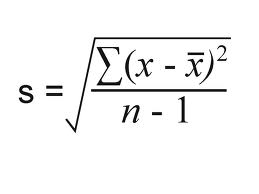
Source: https://www.statisticshowto.com/probability-and-statistics/standard-deviation/

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Participation Info 
|**Test**|**Category**|**State(s)**|**Additional Info**|
|---|---|---||
|SAT 2017|Lowest Participation|North Dakota, Mississipipi, Iowa, Missouri, Utah||
|SAT 2017|Highest Participation|Colombia, Michigan, Connecticut, Delaware, New Hempshire||
|SAT 2018|Lowest Participation|North Dakota, Wyoming, South dakota, Nebraska, Wisconsin||
|SAT 2018|Highest Participation|Colorado, Connecticut, Delaware, Michigan, Idaho||
|ACT 2017|Lowest Participation|Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania||
|ACT 2017|Highest Participation|Alabama, Kentucky, Wisconsin, Utah, Tennessee||
|ACT 2018|Lowest Participation|Maine, Rhode Island, New Hempshire, Delaware, Pennsylvania||
|ACT 2018|Highest Participation|Alabama, Kentucky, Wisconsin, Utah, Tennessee||


In [44]:
# Formula to adjust to find out highest and lowest participation for various test across year
final.sort_values('part_act2018', ascending = False).head(7)

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,part_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.0,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
18,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,...,1.0,19.9,19.7,20.8,20.1,20.2,0.04,630,618,1248
50,Wisconsin,1.0,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,1.0,19.8,20.3,20.6,20.8,20.5,0.03,641,653,1294
45,Utah,1.0,19.5,19.9,20.8,20.6,20.3,0.03,624,614,...,1.0,19.7,19.9,20.9,20.5,20.4,0.04,480,530,1010
43,Tennessee,1.0,19.5,19.2,20.1,19.9,19.8,0.05,623,604,...,1.0,19.4,19.1,19.9,19.6,19.6,0.06,624,607,1231
41,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,1.0,17.3,18.2,18.6,18.5,18.3,0.55,547,523,1070
37,Oklahoma,1.0,18.5,18.8,20.1,19.6,19.4,0.07,530,517,...,1.0,18.4,18.8,20.1,19.4,19.3,0.08,541,521,1062


### Scoring Info 
|**Test**|**Category**|**State(s)**|**Additional Info**|
|---|---|---||
|SAT 2017|Lowest Score|colombia, Delaware, Idaho, Michigan, Maine|***Very high participation for SAT but low part for ACT***|
|SAT 2017|Highest Score|Minnesota, Wisconsin, Iowan, Missouri, Kansas|***Very low participation for SAT buthigh part for ACT***|
|SAT 2018|Lowest Score|Colombia, Delaware, West Virginia, Idaho, Utah|***High participation for SAT except for West Vir and Utah***|
|SAT 2018|Highest Score|Minnesota, Wisconsin, North Dakota, Iowa|***Low participation for SAT but high for ACT***|
|ACT 2017|Lowest Score|Nevada, Mississippi, South Carolina, Hawaii, North Carolina|***High Participation for ACT but low for SAT***|
|ACT 2017|Highest Score|New Hamshire, Massachusetts, Connecticut, Maine, Columbia|***Low ACT participation but high SAT participation***|
|ACT 2018|Lowest Score|Nevada, South Carolina, Mississippi, Hawaii, Alabama|***High ACT participation but low SAT participation***|
|ACT 2018|Highest Score|Connecticut, Massachusetts, New Hampshire, New York, Michigan|***Low ACT participation but high SAT participation***|

In [45]:
# Formula to adjust to find out highest and lowest scores for various test across year
final.sort_values('composite_act2018', ascending = True ).head(7)

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,part_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018
29,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,...,1.00,16.6,17.8,18.0,17.9,17.7,0.23,574,566,1140
41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,1.00,17.3,18.2,18.6,18.5,18.3,0.55,547,523,1070
25,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,1.00,18.2,18.1,18.9,18.6,18.6,0.03,630,606,1236
12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,0.89,18.2,19.0,19.1,19.0,18.9,0.56,480,530,1010
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
34,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,1.00,18.0,19.3,19.5,19.2,19.1,0.52,554,543,1098
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149


In [46]:
# We will need to insert a couple of new columns to track the difference between years
# We create 2 new columns, one for SAT and one for ACT

final['part_change_act2018'] = final['part_act2018'] - final['part_act2017']
final['part_change_sat2018'] = final['part_sat2018'] - final['part_sat2017']

In [47]:
# Find the change in states with 100% participation between years on both tests
final[(final['part_act2017'] == 1) & (final['part_change_act2018'] != 0)]

# We have 2 states Colorado and Minnesota.
# First, we can ignore Minnesota as the change is marginal at 1%
# For colorado, we see a large change of 70% in act but an increase of 89% in sat.
# My guess is that ACT was previously the test of choice for colorado but it was changed
# This is to be corroborated with external research later on

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018
6,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,23.2,24.4,23.5,23.9,1.00,519,506,1025,-0.70,0.89
24,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,21.4,21.7,21.4,21.3,0.04,643,655,1298,-0.01,0.01


In [48]:
# Find the change in states with 100% participation between years on both tests
final[(final['part_sat2017'] == 1) & (final['part_change_sat2018'] != 0)]

# Only 1 state, columbia. Not significant

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482,468,...,22.7,24.4,23.0,23.6,0.92,497,480,977,0.0,-0.08


In [49]:
final[(final['part_sat2018'] <= 0.1)]

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,18.3,19.6,19.0,19.1,0.06,595,571,1166,0.00,0.01
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,18.9,19.7,19.4,19.4,0.05,592,576,1169,0.00,0.02
16,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,...,21.2,22.5,22.0,21.8,0.03,634,631,1265,0.01,0.01
17,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,...,21.1,22.3,21.5,21.6,0.04,633,631,1265,-0.02,0.00
18,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,...,19.7,20.8,20.1,20.2,0.04,630,618,1248,0.00,0.00
19,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611,586,...,18.5,19.6,19.1,19.2,0.04,615,595,1210,0.00,0.00
24,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,21.4,21.7,21.4,21.3,0.04,643,655,1298,-0.01,0.01
25,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,18.1,18.9,18.6,18.6,0.03,630,606,1236,0.00,0.01
26,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,...,19.7,20.5,20.0,20.0,0.04,633,629,1262,0.00,0.01
27,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,591,...,19.9,20.7,20.0,20.0,0.10,606,592,1198,0.00,0.00


### States with 100% participation
Looking into the data, we have 17 states which had 100% participation for ACT 2017 and only 2 of these saw a change in 2018. One of them was Minnesota with a 1% decrease which is not significant. The other was Colorado, which saw a drastic decrease in ACT participation and a significant increase in SAT participation from 2017 to 2018.

As for the SAT, we have 4 states with 100% participation in 2017. Only 1, Colombia, had a small decrease of 8% from 2017 to 2018.

My thinking is that the ACT and SAT are compulsory within certain states and that is why we see such consistent 100% participation across the years.

Overall, Colorado seems to be a good case study going forward

In [50]:
final[(final['part_act2017'] > 0.5) & (final['part_sat2017'] > 0.5)]

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,19.3,21.1,19.5,19.9,0.56,550,549,1099,-0.07,-0.27
11,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,20.7,21.2,21.4,21.4,0.70,542,522,1064,-0.02,0.09
12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,19.0,19.1,19.0,18.9,0.56,480,530,1010,-0.01,0.01


In [51]:
final[(final['part_act2018'] > 0.5) & (final['part_sat2018'] > 0.5)]

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,math_act2018,reading_act2018,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,19.3,21.1,19.5,19.9,0.56,550,549,1099,-0.07,-0.27
11,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,20.7,21.2,21.4,21.4,0.70,542,522,1064,-0.02,0.09
12,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,19.0,19.1,19.0,18.9,0.56,480,530,1010,-0.01,0.01
34,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,19.3,19.5,19.2,19.1,0.52,554,543,1098,0.00,0.03
41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,18.2,18.6,18.5,18.3,0.55,547,523,1070,0.00,0.05


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [52]:
def plot_heatmap(df, title):
    fig = plt.figure(figsize = (16,6))
    mask = np.triu(np.ones_like(df.corr()))
    heatmap = sns.heatmap(df.corr(),
                    annot = True,
                    annot_kws = {'size' :  12},
                    mask = mask,
                    cmap = "Blues")
    heatmap.set_title(title, fontsize = 20)
    heatmap.tick_params(axis='x', rotation = 45, labelsize = 10)
    heatmap.tick_params(axis = 'y', rotation = 0, labelsize = 10)
    y_min, y_max = heatmap.get_ylim()
    x_min, x_max = heatmap.get_xlim()
    heatmap.set_ylim(top = y_max + 1)
    heatmap.set_xlim(right = x_max - 1)
    

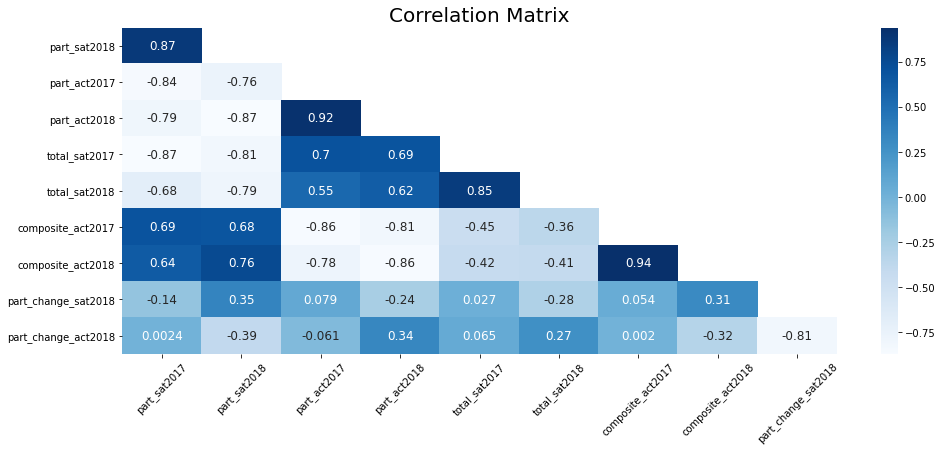

In [53]:
final_sliced = final[['part_sat2017', 'part_sat2018', 'part_act2017', 'part_act2018',
                     'total_sat2017', 'total_sat2018', 'composite_act2017', 'composite_act2018',
                     'part_change_sat2018', 'part_change_act2018']] 
plot_heatmap(final_sliced, 'Correlation Matrix')

## Correlations
Through plotting selected columns of the data, we have the above correlation matrix. Columns with breakdowns of scores were dropped and only the total/ composite ones remained.

Some observations:

**1.** High positive correlation between the participation rate for same test over the 2 years

**2.** High negative correlation between the participation rate and score (i.e. the more people take, the lower the average score)

**3.** High negative correlation between the participation rate for one test to the other in the same year.


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [54]:
# Changing the default font for matplotlib
plt.rcParams['font.sans-serif'] = "Comic Sans MS"

plt.rcParams['font.family'] = "Arial"

In [55]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, figsize,
                      bin_num, xlim, ylim):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = figsize) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column], bins = bin_num, color = "midnightblue") 
        ax[i].tick_params(axis="x", labelsize=14)
        ax[i].tick_params(axis="y", labelsize=14)
        ax[i].set_title(list_of_titles[i], fontname = 'Arial', fontsize = 16)
        ax[i].set_xlabel(list_of_xlabels[i], fontname = 'Arial', fontsize = 14)
        ax[i].set_ylabel(list_of_ylabels[i], fontname = 'Arial', fontsize = 14)
        ax[i].set_xlim(xlim[i])
        ax[i].set_ylim(ylim[i])
        ax[i].grid(False)
    
    fig.tight_layout(pad=3.0)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

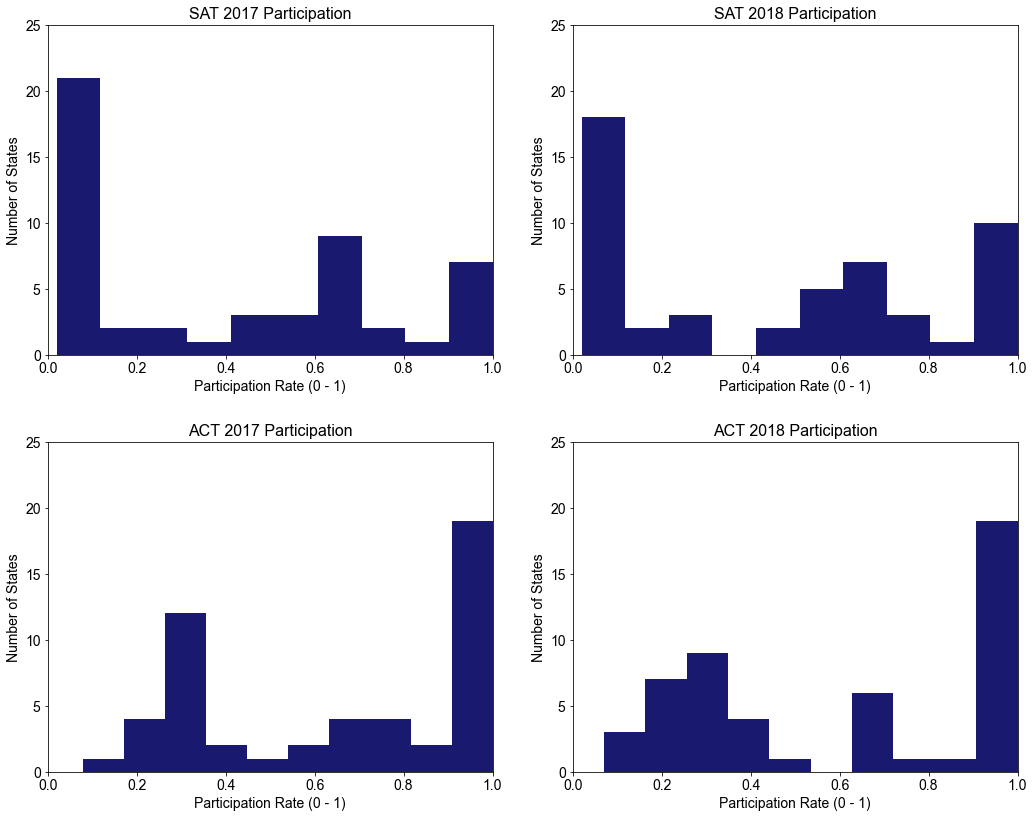

In [56]:
# Participation rates for SAT and ACT
subplot_histograms(final, 
                   ['part_sat2017', 'part_sat2018', 'part_act2017', 'part_act2018'],
                   ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation'],
                   ['Participation Rate (0 - 1)', 'Participation Rate (0 - 1)', 'Participation Rate (0 - 1)', 'Participation Rate (0 - 1)'],
                   ['Number of States', 'Number of States', 'Number of States', 'Number of States'],
                   (15,12),
                   10,
                  [[0,1], [0,1], [0,1], [0,1]],
                  [[0,25], [0,25], [0,25], [0,25]])

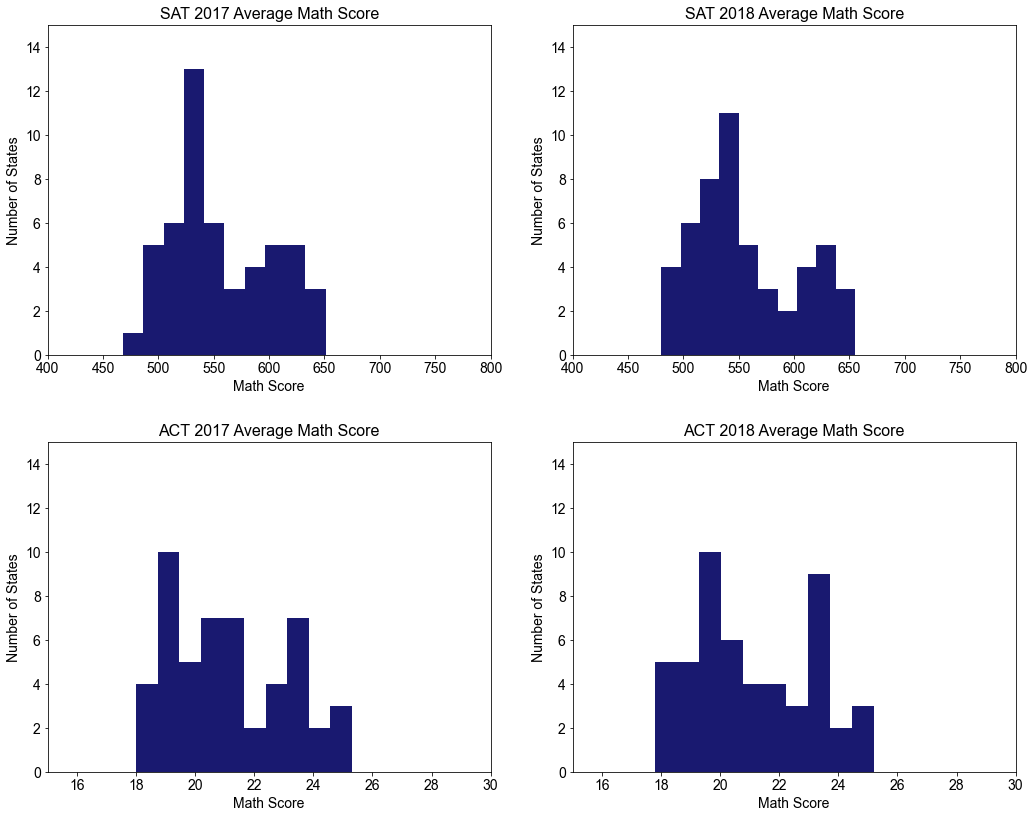

In [57]:
# Math scores for ACT and SAT
subplot_histograms(final, 
                   ['math_sat2017', 'math_sat2018', 'math_act2017', 'math_act2018'],
                   ['SAT 2017 Average Math Score', 'SAT 2018 Average Math Score', 'ACT 2017 Average Math Score', 'ACT 2018 Average Math Score'],
                   ['Math Score', 'Math Score', 'Math Score', 'Math Score'],
                   ['Number of States', 'Number of States', 'Number of States', 'Number of States'],
                   (15,12),
                   10,
                  [[400, 800], [400, 800], [15,30], [15,30]],
                  [[0,15], [0,15], [0,15], [0,15]])

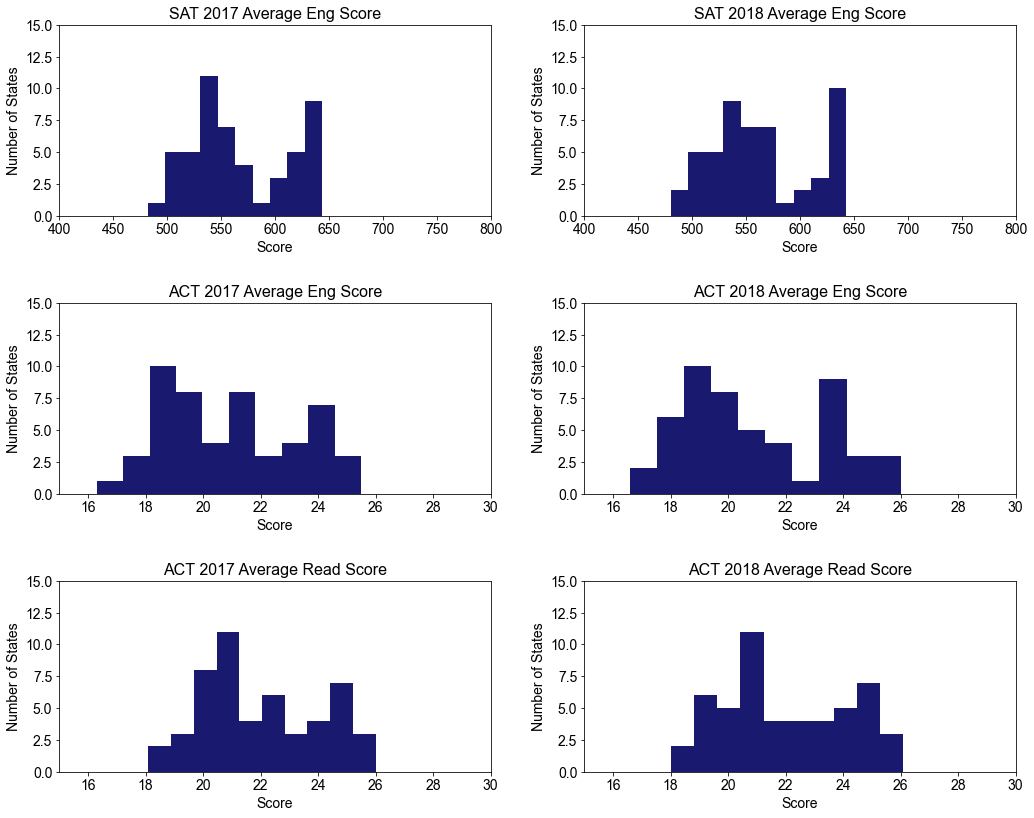

In [58]:
# Math scores for ACT and SAT
subplot_histograms(final, 
                   ['read_n_write_sat2017', 'read_n_write_sat2018', 'english_act2017', 'english_act2018', 'reading_act2017', 'reading_act2018'],
                   ['SAT 2017 Average Eng Score', 'SAT 2018 Average Eng Score', 'ACT 2017 Average Eng Score', 'ACT 2018 Average Eng Score',  'ACT 2017 Average Read Score', 'ACT 2018 Average Read Score'],
                   ['Score', 'Score', 'Score', 'Score', 'Score', 'Score'],
                   ['Number of States', 'Number of States', 'Number of States', 'Number of States', 'Number of States', 'Number of States'],
                   (15,12),
                   10,
                  [[400, 800], [400, 800], [15,30], [15,30], [15,30], [15,30]],
                  [[0,15], [0,15], [0,15], [0,15], [0,15], [0,15]])

## Histogram Intepretation
Most of the histograms are not normally distributed and are mostly multimodal distributions.

### On Participation Rates
In the 2017 SATs, we saw a large proportion of states with 10% or less participation and a low proportion of states with 90% or more participation.

This changed slightly in 2018 with less states with less than 10% participation and more with 90% or more participation.

However, when compared with the ACT across both years, the ACT saw little to no states with less than 10% participation and significantly more states with 90% or more participation.

### On Math Scores
The data is generally right/ positive skewed for all and this is further corroborated by the stats above where median for all math tests across years is lower than the mean.

### On English/ Reading Scores
Multimodal as well with right/ positive skew.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [59]:
def plot_scatter(x, y, title, xlabel, ylabel, figsize
                    ):
    plt.scatter(x = x, y = y, color = 'midnightblue')
    plt.title(title, fontname = 'Arial', fontsize = 16)
    plt.xlabel(xlabel, fontname = 'Arial',fontsize = 14)
    plt.ylabel(ylabel, fontname = 'Arial', fontsize = 14)
    # plt.xlim(400,700)
    # plt.ylim(15,25)
   

In [60]:
def plot_scatter_line(x, y, title, xlabel, ylabel, figsize):
    m, b = np.polyfit(x, y, 1)
    plt.scatter(x = x, y = y, color = 'midnightblue')
    plt.title(title, fontname = 'Arial', fontsize = 16)
    plt.xlabel(xlabel, fontname = 'Arial',fontsize = 14)
    plt.ylabel(ylabel, fontname = 'Arial', fontsize = 14)
    # plt.xlim(400,700)
    # plt.ylim(15,25)()
    plt.plot(x, m * x + b, color = 'darkgoldenrod')

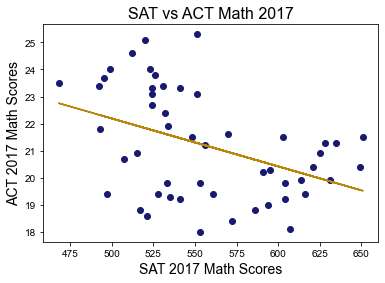

In [61]:
plot_scatter_line(final['math_sat2017'], final['math_act2017'], 'SAT vs ACT Math 2017', 'SAT 2017 Math Scores',
            'ACT 2017 Math Scores', (10,10))

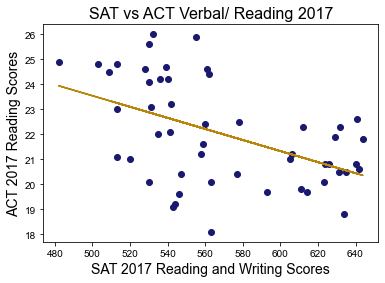

In [62]:
plot_scatter_line(final['read_n_write_sat2017'], final['reading_act2017'], 'SAT vs ACT Verbal/ Reading 2017', 'SAT 2017 Reading and Writing Scores',
            'ACT 2017 Reading Scores', (10,10))

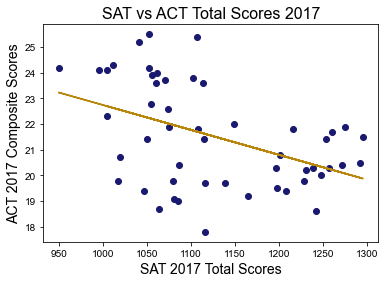

In [63]:
plot_scatter_line(final['total_sat2017'], final['composite_act2017'], 'SAT vs ACT Total Scores 2017', 'SAT 2017 Total Scores',
            'ACT 2017 Composite Scores', (10,10))

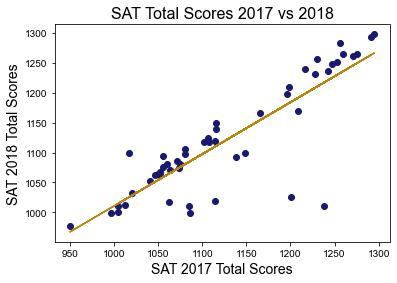

In [64]:
plot_scatter_line(final['total_sat2017'], final['total_sat2018'], 'SAT Total Scores 2017 vs 2018', 'SAT 2017 Total Scores',
            'SAT 2018 Total Scores', (10,10))

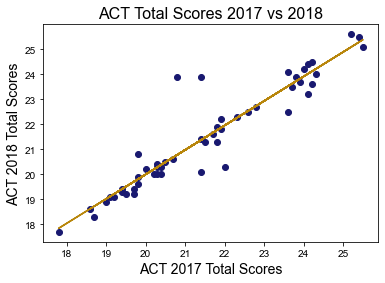

In [65]:
plot_scatter_line(final['composite_act2017'], final['composite_act2018'], 'ACT Total Scores 2017 vs 2018', 'ACT 2017 Total Scores',
            'ACT 2018 Total Scores', (10,10))

## Scatter Plot Intepretations

For the comparison of same subject scores across both tests, there seems to be a moderately strong relationship. However, this is somewhat misleading. Looking at the scatter plots for Math for example, there is a negative correlation between SAT Math scores and ACT Math scores. This can mean one of 2 things (assuming the sampling is done fairly):

1. Students that do well for one test do not do well for the other, indicating that the tests are so different in nature that being proficient in one area of maths would mean you will struggle with the other.
2. In states where participation is low, the test scores are generally higher (as seen from the previous correlation matrix). In states with low SAT participation, there is likely to be high ACT test participation. Since we know that low participation in a test results in a higher score, this relationship makes sense.

As for SAT and ACT test scores across the years, we see a strong correlation. If a state fared well in one test in 2017, it is likely for them to fare well in 2018. This goes back to the fact that participation rates do not really change across years (with the exception of a handful of states). If the state had high participation in 2017, it is likely that test scores would be low and this result continues into 2018. 

As for why there is a negative correlation between participation rate and test scores, it could be the case that madatory statewide testing will include the whole state in the sample (bringing down the average score). There might be a handful of hardworking students that opt to take both tests and these students are likely the ones who score higher as well

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [66]:
def create_boxplot(df_list, title_list, xlabel_list, ylabel_list, xticks_list, figsize):
    ncols = len(df_list)
    nrows = int(np.ceil(len(df_list)/2))
    
    fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = figsize)
    
    for i in range(len(df_list)):
        ax[i] = sns.boxplot(x='variable', y='value', data=pd.melt(df_list[i]), ax = ax[i], color = 'cadetblue',saturation=0.75, width = 0.5)
        ax[i].set_title(title_list[i], fontsize = 20)
        ax[i].set_xlabel(xlabel_list[i], fontsize = 16)
        ax[i].set_ylabel(ylabel_list[i], fontsize = 16)
        ax[i].tick_params(axis="x", labelsize = 14)
        ax[i].tick_params(axis="y", labelsize = 14)
        ax[i].set_xticklabels(xticks_list)
   

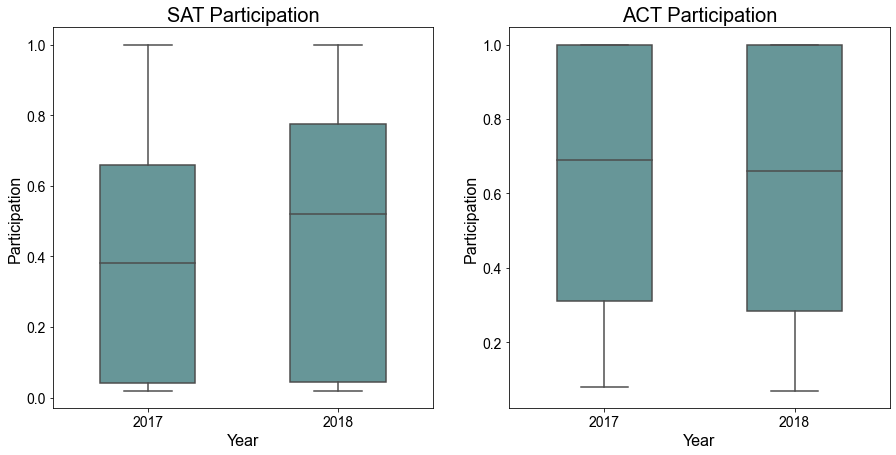

In [67]:
create_boxplot([final[['part_sat2017', 'part_sat2018']], final[['part_act2017', 'part_act2018']]],
              ['SAT Participation', 'ACT Participation'],
              ["Year", "Year"],
              ['Participation', 'Participation'],
              ['2017','2018'],
              (15,7))

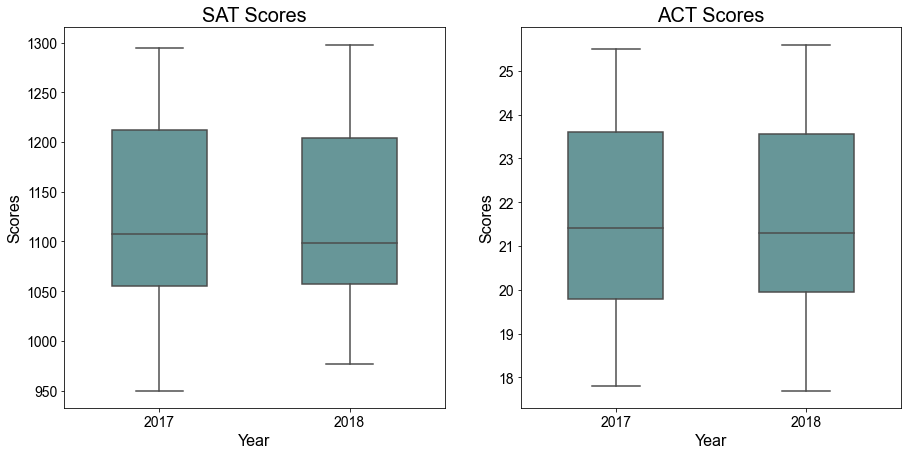

In [68]:
create_boxplot([final[['total_sat2017', 'total_sat2018']], final[['composite_act2017', 'composite_act2018']]],
              ['SAT Scores', 'ACT Scores'],
              ["Year", "Year"],
              ['Scores', 'Scores'],
              ['2017','2018'],
              (15,7))

## Boxplot Intepretations

For SAT participation, there is a right skew to the data and for ACT, there is a left skew. The median participation for ACT is also higher than that of the SAT. Similar to above, we see an increase in participation from 2017 to 2018 for SAT and the converse is true for ACT.

The spread for ACT and SAT across the 2 years look generally the same, with a right skew and the interquatile range lying somewhat in the middle of the range of data.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [69]:
final['diff_act'] = final['composite_act2018'] - final['composite_act2017']
final['diff_sat'] = final['total_sat2018'] - final['total_sat2017']

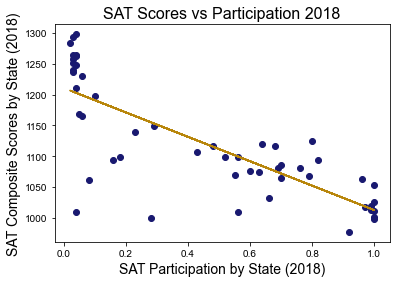

In [70]:
plot_scatter_line(final['part_sat2018'], final['total_sat2018'], 'SAT Scores vs Participation 2018', 'SAT Participation by State (2018)',
            'SAT Composite Scores by State (2018)', (10,10))

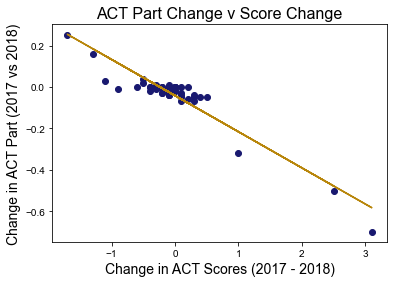

In [71]:
plot_scatter_line(final['diff_act'], final['part_change_act2018'], 'ACT Part Change v Score Change', 'Change in ACT Scores (2017 - 2018)',
            'Change in ACT Part (2017 vs 2018)', (10,10))

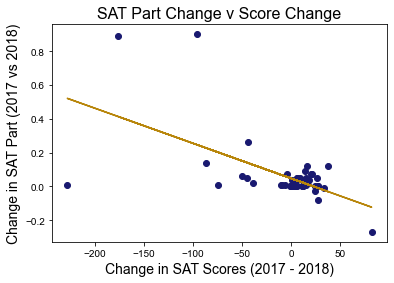

In [72]:
plot_scatter_line(final['diff_sat'], final['part_change_sat2018'], 'SAT Part Change v Score Change', 'Change in SAT Scores (2017 - 2018)',
            'Change in SAT Part (2017 vs 2018)', (10,10))

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [73]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
part_act2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.00
english_act2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.50
math_act2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.30
reading_act2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.00
science_act2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.90
composite_act2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.50
part_sat2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.00
read_n_write_sat2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.00
math_sat2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.00
total_sat2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.00


### Distribution of Variables
|**Variable**|**Distribution**|
|---|---|
|part_act2017|Multimodal with left skew|
|english_act2017|Multimodal with right skew|
|math_act2017|Multimodal with right skew|
|reading_act2017|Multimodal with right skew|
|science_act2017|Multimodal with right skew|
|composite_act2017|Multimodal with right skew|
|part_sat2017|Multimodal with right skew|
|read_n_write_sat2017|Multimodal with right skew|
|math_sat2017|Multimodal with right skew|
|total_sat2017|Multimodal with right skew|
|part_act2018|Multimodal with left skew|
|english_act2018|Multimodal with right skew|
|math_act2018|Multimodal with right skew|
|reading_act2018|Multimodal with right skew|
|science_act2018|Multimodal with right skew|
|composite_act2018|Multimodal with right skew|
|part_sat2018|Multimodal with left skew|
|read_n_write_sat2018|Multimodal with right skew|
|math_sat2018|Multimodal with right skew|
|total_sat2018|Multimodal with right skew|
|part_change_act2018|Normal centering 0|
|part_change_sat2018|Normal centering 0|
|diff_act|Normal centering 0|
|diff_sat|Normal centering around 20|

Using the summary statistics above and also by plotting out the distribution for each variable, we can see what the distribution of each variable looks like. We are able to see if the distribution centers around a certain value and also the skew. The skew can be further corroborated by looking at mean and median values from the summary table above as well.

In [74]:
# We create a function to plot a dist plot for each variable, run it and update our table above on the distribution type

def plot_dist(x):
    sns.distplot(x, kde = True)

C:\Users\gregw\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


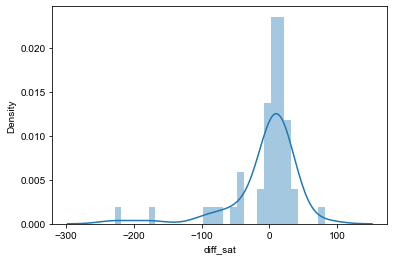

In [75]:
plot_dist(final['diff_sat'])

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

It appears that the data is generally not normally distributed. Most of the data does not center around the mean and is multimodal.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

No it does not. Generally, by CLT, out sampling distribution should result in a normal distribution. However, it appears that we run into an some bias as the participation rates are skewed to very low and very high. That in turn affects the scoring of the particular state as we have explored earlier (low participation --> higher scores). There is some degree of samping bias whereby there is a bias in which a sample is collected in such a way that some members of the intended population have a lower or higher sampling probability than others. It results in a biased sample of a population in which all individuals, or instances, were not equally likely to have been selected.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

It can still be useful to compare relatioships between variables. For example, participation rates are not impacted by any other variable and there is little to no bias in that observation. However, for other variables where bias exists, it is important to bear this in mind and account for it during analysis. Any other analysis done which relies on an underlying normal distribution might not be as meaningful.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

No it is not. Firstly, there is not evident that both tests are equivalent. Secondly, there is also bias as mentioned above. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [76]:
final.loc[final['part_change_sat2018'] > 0.5]


,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018,diff_act,diff_sat
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,23.5,23.9,1.00,519,506,1025,-0.7,0.89,3.1,-176
14,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559,556,...,23.4,23.9,0.99,513,506,1019,-0.5,0.90,2.5,-96


Colorado and Illinois have significant changes to 89% and 90%
Colorado department of education changed the requirements
Since 2001, Colorado has required every high school junior to take the ACT as their 11th grade college entrance
exam, for which the state covered the cost. House Bill 15-1323 established a competitive bid process for
Colorado’s college entrance exam (including both 10th and 11th grade assessments). In December of 2015, a
selection committee composed of educators, counselors and administrators from diverse geographic regions
across the state voted to adopt SAT as the required test. Several other states have recently made the same
decision to use SAT instead of ACT, including Connecticut, Michigan, Hawaii, Oregon, South Carolina, and Illinois.
Parents/students will not be charged any additional fees for the switch to SAT.
In March 2015, College Board partnered with Khan Academy to provide free, personalized test prep for
any student with computer access, saving students and families at least $300 and leveling the playing
field for families that might not be able to afford test prep or tutors for their children.

In [77]:
final[(final['part_act2017'] == 1) | (final['part_sat2017'] == 1)]

,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,math_sat2017,...,science_act2018,composite_act2018,part_sat2018,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018,diff_act,diff_sat
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,19.0,19.1,0.06,595,571,1166,0.00,0.01,-0.1,1
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,19.4,19.4,0.05,592,576,1169,0.00,0.02,0.0,-39
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,23.5,23.9,1.00,519,506,1025,-0.70,0.89,3.1,-176
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,24.9,25.6,1.00,535,519,1053,-0.05,0.00,0.4,12
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,23.4,23.2,1.00,505,492,998,-0.01,0.00,-0.9,2
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,23.0,23.6,0.92,497,480,977,0.00,-0.08,-0.6,27
18,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,...,20.1,20.2,0.04,630,618,1248,0.00,0.00,0.2,1
19,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611,586,...,19.1,19.2,0.04,615,595,1210,0.00,0.00,-0.3,12
23,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,23.9,24.4,1.00,511,499,1011,-0.07,0.00,0.3,6
24,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,21.4,21.3,0.04,643,655,1298,-0.01,0.01,-0.2,3


These are also the states where statewide testing is mandatory.

In [78]:
# Import in new data file with 2016 election results. Hypothesis that education policies might be stronger in certain states
final_v2 = pd.read_csv('C:/Users/gregw/Desktop/General Assembly/dsi-roughwork/materials/project_1/data/final_v1.csv')

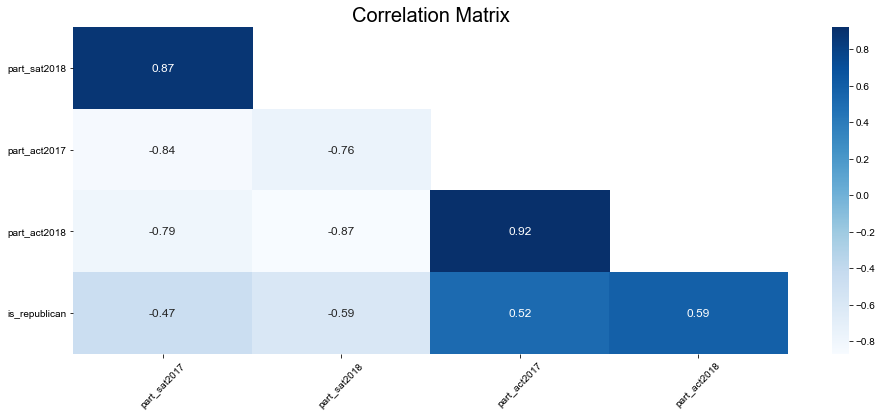

In [79]:
final_sliced_pol = final_v2[['part_sat2017', 'part_sat2018', 'part_act2017', 'part_act2018',
                     'is_republican']] 
plot_heatmap(final_sliced_pol, 'Correlation Matrix')

We see a positive correlation for states being republican and ACT participation rate and a negative correlation for states beinf republican and the SAT participation rate. My initial assumption would be that republican organisations/ education policies favour the ACT. We can look at this by comparing the 2 different groups. 

1. States with mandatory ACT testing
2. States with mandatory SAT testing

And then look at the proportion of democratic vs republication states within each subgroup

For 2017, there were 19 states with participation rates greater than 90% for the ACT, 15 of these were republican states.
As for the SAT in 2017, 7 states had participation rates greater than 90%, 5 of these were democratic states.

For 2018, there were 19 states with participation rates greater than 90% for the ACT, 17 of these were republican states.
There were 10 states with participation greater than 90% for the SATs in 2018, 8 of these were democractic states.



In [80]:
final_v2[(final_v2['part_act2018'] > 0.9)]

,Unnamed: 0,state,part_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,part_sat2017,read_n_write_sat2017,...,read_n_write_sat2018,math_sat2018,total_sat2018,part_change_act2018,part_change_sat2018,is_republican,med_house_inc_2018,med_house_inc_2017,highschool_2021,bachelor_2021
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,...,595,571,1166,0.00,0.01,1,49861,48123,0.86,0.26
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,...,592,576,1169,0.00,0.02,1,47062,45869,0.87,0.23
17,18,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,...,630,618,1248,0.00,0.00,1,50247,48375,0.86,0.24
18,19,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611,...,615,595,1210,0.00,0.00,1,47905,46145,0.85,0.24
23,24,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,...,643,655,1298,-0.01,0.01,0,70315,68388,0.93,0.36
24,25,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,...,630,606,1236,0.00,0.01,1,44717,43529,0.85,0.22
25,26,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,...,633,629,1262,0.00,0.01,1,54478,53578,0.90,0.29
26,27,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,...,606,592,1198,0.00,0.00,1,55328,53386,0.94,0.32
27,28,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,...,629,623,1252,0.16,0.00,1,59566,59970,0.91,0.32
28,29,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,...,574,566,1140,0.00,-0.03,0,58646,58003,0.87,0.25


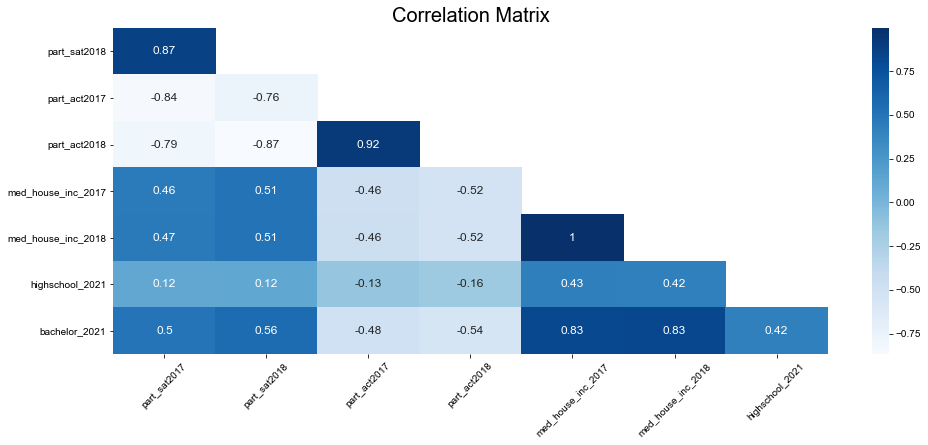

In [81]:
final_sliced_ed = final_v2[['part_sat2017', 'part_sat2018', 'part_act2017', 'part_act2018',
                     'med_house_inc_2017', 'med_house_inc_2018', 'highschool_2021', 'bachelor_2021']] 
plot_heatmap(final_sliced_ed, 'Correlation Matrix')

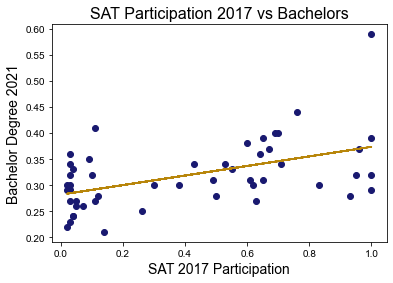

In [82]:
# Plot Scatter of SAT Part with bachelors 2018
plot_scatter_line(final_v2['part_sat2017'], final_v2['bachelor_2021'], 'SAT Participation 2017 vs Bachelors', 'SAT 2017 Participation',
            'Bachelor Degree 2021', (10,10))

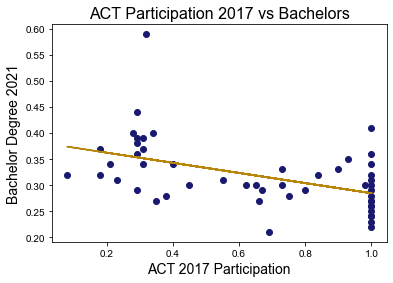

In [83]:
# Plot Scatter of ACT Part with bachelors 2018
plot_scatter_line(final_v2['part_act2017'], final_v2['bachelor_2021'], 'ACT Participation 2017 vs Bachelors', 'ACT 2017 Participation',
            'Bachelor Degree 2021', (10,10))

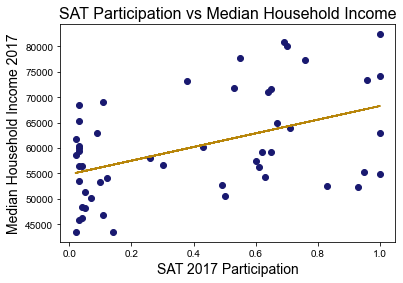

In [84]:
# Plot Scatter of SAT Part with Median Household Income 2017
plot_scatter_line(final_v2['part_sat2017'], final_v2['med_house_inc_2017'], 'SAT Participation vs Median Household Income', 
             'SAT 2017 Participation',
            'Median Household Income 2017', (10,10))

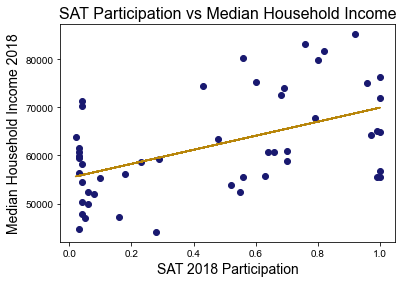

In [85]:
# Plot Scatter of SAT Part with Median Household Income 2017
plot_scatter_line(final_v2['part_sat2018'], final_v2['med_house_inc_2018'], 'SAT Participation vs Median Household Income', 
             'SAT 2018 Participation',
            'Median Household Income 2018', (10,10))

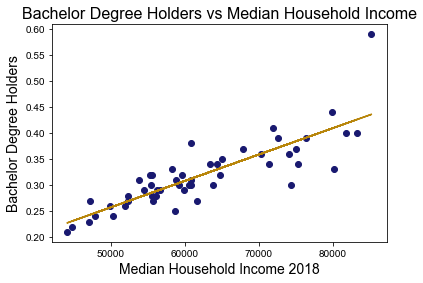

In [86]:
# Plot Scatter of SAT Part with Median Household Income 2017
plot_scatter_line(final_v2['med_house_inc_2018'], final_v2['bachelor_2021'], 'Bachelor Degree Holders vs Median Household Income', 
             'Median Household Income 2018',
            'Bachelor Degree Holders', (10,10))

## Sources
[NY Times 2016 Election Results](https://www.nytimes.com/elections/2016/results/president)

[Education attainment for US](https://www.census.gov/data/tables/2018/demo/education-attainment/cps-detailed-tables.html)

[Education attainment for Columbia](https://www.richmondfed.us/-/media/richmondfedorg/research/regional_economy/reports/special_reports/pdf/educational_attainment_dc.pdf)

[US Population Stats](https://worldpopulationreview.com/states)

[US Income Stats](https://data.census.gov/cedsci/map?q=S1901%3A%20INCOME%20IN%20THE%20PAST%2012%20MONTHS%20%28IN%202018%20INFLATION-ADJUSTED%20DOLLARS%29&g=0400000US01,02,04,05,06,08,09,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72&tid=ACSST1Y2018.S1901&hidePreview=false&cid=S1901_C01_001E&vintage=2018&layer=VT_2018_040_00_PP_D1)




## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The best way for us to increase participation in the SAT is to have it be the mandatory test of choice for a particular state. Education should be one of the top priorities for any state and most states will be able to afford funding for the test. This should also be an easy decision for states to make as there is a strong positive correlation between median household income and the proportion of bachelor degree holders in a particular state.

This then begs the question - which states should we target? We first remove all states that have more than 90% pariticpation in the SATs. We then should narrow down to democratic states and also states with a relatively higher median household income.

Democratic states that do not have a high rate of participation include Nevada (currently using the ACT) and also New Mexico.

Wisconsin and Wyoming are also the 2 states that have relatively high median household income of 90, 773 and 61, 584 respectively. 

When doing so and attempting to convince the state to take on the SAT, we should first see what additional resources we can provide to support the students in the state (Khan Academy being one such example). It is also important to provide the statistics such as the proportion of Bachelor Degree holders in states that choose to administer the SAT and also the positive benefit of a higher household median income.